## Problem Statement
## Perform sentimental analysis:
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

## 1. Import Libraries

In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## 2. Multi-page web-scraping

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

### Looping through multiple pages

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

### Save results to a Dataframe, then export as CSV

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
1,Ita is an ok product....better to buy a good f...,3.0,The media could not be loaded.\n ...,Reviewed in India on 17 October 2022
2,All good except for few things,4.0,What all is good you can know from other comme...,Reviewed in India on 15 November 2022
3,Worth the price!,4.0,The media could not be loaded.\n ...,Reviewed in India on 26 August 2022
4,Boat xtend after a couple of months,4.0,I have used it for more than 2 months now. Her...,Reviewed in India on 4 December 2022
...,...,...,...,...
1595,Good,5.0,"""the Classic Black Smart Watch Searching for t...",Reviewed in India on 8 November 2022
1596,Nice,5.0,Nice product .service of amazon as well as boa...,Reviewed in India on 11 November 2022
1597,Great Purchase,5.0,I bought this smartwatch for my teenage son! H...,Reviewed in India on 7 November 2022
1598,Awesome to wear,5.0,After trying many products of different brands...,Reviewed in India on 8 November 2022


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head(50)

,Title,Rating,Review,Review_Date
0,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
1,Ita is an ok product....better to buy a good f...,3.0,The media could not be loaded.\n ...,17 October 2022
2,All good except for few things,4.0,What all is good you can know from other comme...,15 November 2022
3,Worth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
4,Boat xtend after a couple of months,4.0,I have used it for more than 2 months now. Her...,4 December 2022
5,Good but could have been better for a RS 3500 ...,3.0,"Pros:1. Amoled Display is super, usable at ver...",24 November 2022
6,"Sensors are not accurate, Bluetooth calling is...",3.0,Display and touch is good. Notification featur...,10 December 2022
7,Review after 2 weeks!! Overall Good Experience,4.0,I have been using xtend pro for last 2-3 weeks...,25 October 2022
8,Nice and descent smart watch,4.0,"Likes:Look, touch, steps count, BT Calling, ac...",28 November 2022
9,Happy,4.0,Smart watch very happy,12 December 2022


In [9]:
df.to_csv("BoatSmartWatch_Review.csv")

## 3. Load Dataset

In [10]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
1,Ita is an ok product....better to buy a good f...,3.0,The media could not be loaded.\n ...,17 October 2022
2,All good except for few things,4.0,What all is good you can know from other comme...,15 November 2022
3,Worth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
4,Boat xtend after a couple of months,4.0,I have used it for more than 2 months now. Her...,4 December 2022
...,...,...,...,...
1595,Good,5.0,"""the Classic Black Smart Watch Searching for t...",8 November 2022
1596,Nice,5.0,Nice product .service of amazon as well as boa...,11 November 2022
1597,Great Purchase,5.0,I bought this smartwatch for my teenage son! H...,7 November 2022
1598,Awesome to wear,5.0,After trying many products of different brands...,8 November 2022


## 4. Data Exploration

In [11]:
reviews.Rating.describe()

count    1600.000000
mean        3.715000
std         1.658461
min         1.000000
25%         2.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1600 non-null   object 
 1   Rating       1600 non-null   float64
 2   Review       1553 non-null   object 
 3   Review_Date  1600 non-null   object 
dtypes: float64(1), object(3)
memory usage: 50.1+ KB


In [13]:
reviews.isna().sum()

Title           0
Rating          0
Review         47
Review_Date     0
dtype: int64

In [14]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
1,Ita is an ok product....better to buy a good f...,3.0,The media could not be loaded.\n ...,17 October 2022
2,All good except for few things,4.0,What all is good you can know from other comme...,15 November 2022
3,Worth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
4,Boat xtend after a couple of months,4.0,I have used it for more than 2 months now. Her...,4 December 2022


## 5. Data Visualization

### Date vs Review Count

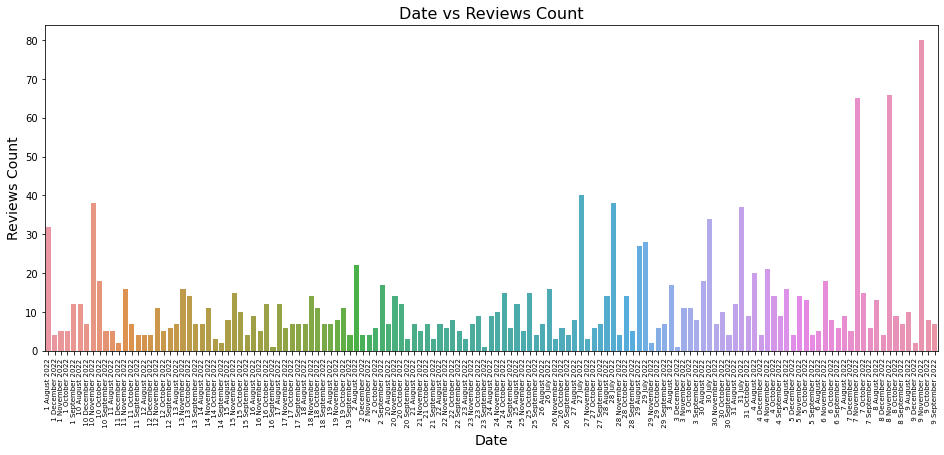

In [15]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

### Percentage of Ratings

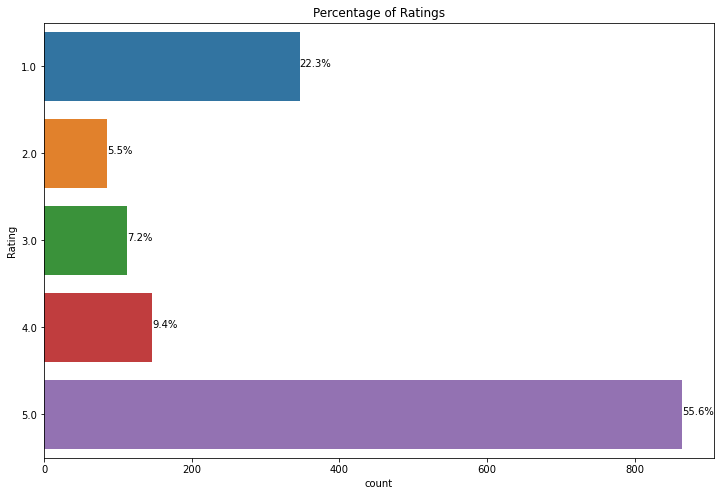

In [16]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

## 6. BasicText Preprocessing for Sentiment Analysis

### Spelling Correction

In [18]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Shipping the parts mostly covered in other rev...
1    The media could not be loaded.\n              ...
2    That all is good you can know from other comme...
3    The media could not be loaded.\n              ...
4    I have used it for more than 2 months now. Wer...
Name: Review, dtype: object

In [19]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Skipping the parts mostly covered in other rev...
1,The media could not be loaded.\n ...
2,What all is good you can know from other comme...
3,The media could not be loaded.\n ...
4,I have used it for more than 2 months now. Her...
...,...
1595,"""the Classic Black Smart Watch Searching for t..."
1596,Nice product .service of amazon as well as boa...
1597,I bought this smartwatch for my teenage son! H...
1598,After trying many products of different brands...


### Resetting index

In [20]:
boat_review.reset_index(drop=True, inplace=True)

In [21]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

### Lemmatizer

In [22]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/1553 [00:00<?, ?it/s]

In [23]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter..."


## 7. Text Pre-processing Techniques

### A. Removing '@names'

In [24]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [25]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter..."
5,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
6,display touch good notification feature also d...,display touch good. notification features also...
7,using xtend pro last week bought great indian ...,i using xtend pro last 2-3 weeks..i bought 299...
8,like look touch step count bt calling activity...,"likes:look, touch, steps count, bt calling, ac..."
9,smart watch happy,smart watch happy


### B. Removing links (http | https)

In [26]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter..."
5,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
6,display touch good notification feature also d...,display touch good. notification features also...
7,using xtend pro last week bought great indian ...,i using xtend pro last 2-3 weeks..i bought 299...
8,like look touch step count bt calling activity...,"likes:look, touch, steps count, bt calling, ac..."
9,smart watch happy,smart watch happy


### C. Removing Review with empty text

In [27]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter..."
5,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
6,display touch good notification feature also d...,display touch good. notification features also...
7,using xtend pro last week bought great indian ...,i using xtend pro last 2-3 weeks..i bought 299...
8,like look touch step count bt calling activity...,"likes:look, touch, steps count, bt calling, ac..."
9,smart watch happy,smart watch happy


### D. Dropping duplicate rows

In [28]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter..."
5,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
6,display touch good notification feature also d...,display touch good. notification features also...
7,using xtend pro last week bought great indian ...,i using xtend pro last 2-3 weeks..i bought 299...
8,like look touch step count bt calling activity...,"likes:look, touch, steps count, bt calling, ac..."
9,smart watch happy,smart watch happy


### E. Function to remove emoji

In [29]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [30]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter..."
5,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
6,display touch good notification feature also d...,display touch good. notification features also...
7,using xtend pro last week bought great indian ...,i using xtend pro last 2-3 weeks..i bought 299...
8,like look touch step count bt calling activity...,"likes:look, touch, steps count, bt calling, ac..."
9,smart watch happy,smart watch happy


### F. Removing Stop words

In [31]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [32]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [33]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter..."
5,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b..."
6,display touch good notification feature also d...,display touch good. notification features also...
7,using xtend pro last week bought great indian ...,i using xtend pro last 2-3 weeks..i bought 299...
8,like look touch step count bt calling activity...,"likes:look, touch, steps count, bt calling, ac..."
9,smart watch happy,smart watch happy


### G. Tokenize 'Clean_Reviews'

In [34]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'hello', 'good', 'day', 'fan', 'boat', 'device', 'recently', 'purchased', 'smart', 'watch', 'brand', 'thought', 'put', 'feedback', 'improved', 'possible', 'via', 'software', 'update', 'volume', 'able', 'increase', 'decrease', 'call', 'notification', 'smart', 'watch', 'unable', 'find', 'setting', 'either', 'watch', 'appfind', 'phone', 'option', 'find', 'watch', 'app', 'use', 'gon', 'na', 'vibrate', 'instead', 'using', 'speaker', 'better', 'locating', 'watch', 'rotating', 'dial', 'dial', 'watch', 'rotates', 'right', 'purpose', 'rotating', 'scrolling', 'option', 'button', 'would', 'better', 'optionnotification', 'adding', 'app', 'option', 'notification', 'section', 'available', 'apps', 'using', 'call', 'display', 'option', 'call', 'call', 'display', 'always', 'displaying', 'whomever', 'ever', 'im', 'speaking', 'phone', 'getting', 'notification', 'watch', 'fine', 'second', 'display', 'continuously', 'nearly', 'minute', 'call', 'want', 'watch', 'batter

In [35]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [skipping, part, mostly, covered, review, spon...
1    [medium, could, loaded, hello, good, day, fan,...
2    [good, know, comment, youtube, let, come, con,...
3    [medium, could, loaded, got, watch, today, che...
4    [used, month, see, pro, battery, run, day, muc...
5    [pro, amoled, display, super, usable, low, low...
6    [display, touch, good, notification, feature, ...
7    [using, xtend, pro, last, week, bought, great,...
8    [like, look, touch, step, count, bt, calling, ...
9                                [smart, watch, happy]
Name: Clean_Reviews, dtype: object

In [36]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,..."
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...,"[good, know, comment, youtube, let, come, con,..."
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che..."
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter...","[used, month, see, pro, battery, run, day, muc..."
5,pro amoled display super usable low low bright...,"pros:1. amoled display super, usable low low b...","[pro, amoled, display, super, usable, low, low..."
6,display touch good notification feature also d...,display touch good. notification features also...,"[display, touch, good, notification, feature, ..."
7,using xtend pro last week bought great indian ...,i using xtend pro last 2-3 weeks..i bought 299...,"[using, xtend, pro, last, week, bought, great,..."
8,like look touch step count bt calling activity...,"likes:look, touch, steps count, bt calling, ac...","[like, look, touch, step, count, bt, calling, ..."
9,smart watch happy,smart watch happy,"[smart, watch, happy]"


### H. Converting words to Stemmer

In [37]:
stemmer = SnowballStemmer("english")

In [38]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,skip part most cover review sponsor yt one add...
1,medium could load hello good day fan boat devi...
2,good know comment youtub let come con connect ...
3,medium could load got watch today check featur...
4,use month see pro batteri run day much comfort...
...,...
1548,classic black smart watch search blutooth call...
1549,nice product servic amazon well boat good cust...
1550,bought smartwatch teenag son ask someth would ...
1551,tri mani product differ brand one best go ahea...


### I. Converting words to Lemma

In [39]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,skipping part mostly covered review sponsored ...
1,medium could loaded hello good day fan boat de...
2,good know comment youtube let come con connect...
3,medium could loaded got watch today checked fe...
4,used month see pro battery run day much comfor...
...,...
1548,classic black smart watch searching blutooth c...
1549,nice product service amazon well boat good cus...
1550,bought smartwatch teenage son asked something ...
1551,trying many product different brand one best g...


## 8. Basic Feature Extaction
### A. Applying bag of Words without N grams

In [40]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [41]:
print(cv.get_feature_names()[109:200])

['amoled', 'amoledsize', 'among', 'amount', 'ample', 'analog', 'analogue', 'ancconsweather', 'andit', 'andlooks', 'android', 'angle', 'animation', 'announced', 'annoying', 'annoyingdo', 'another', 'answer', 'answered', 'answering', 'anyone', 'anything', 'anywhere', 'aod', 'aodhere', 'aomled', 'apart', 'apde', 'apke', 'apne', 'apo', 'app', 'appario', 'appbattery', 'appealing', 'appearance', 'appears', 'appfind', 'apple', 'application', 'applied', 'appoverall', 'appreciable', 'appreciate', 'appreciatedin', 'apprehensive', 'appropriate', 'approx', 'apps', 'apt', 'apx', 'archa', 'area', 'arm', 'around', 'arranged', 'arrive', 'arrived', 'arrives', 'arriving', 'art', 'asap', 'aside', 'ask', 'asked', 'asking', 'asks', 'asleep', 'aspect', 'assist', 'assistance', 'assistant', 'assitance', 'assured', 'atleast', 'atm', 'atmosphere', 'atractivelong', 'attach', 'attached', 'attempted', 'attend', 'attended', 'attending', 'attention', 'attract', 'attracted', 'attracting', 'attraction', 'attractive', 

In [42]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aap', 'aati', 'aawaj', 'aayga', 'abd', 'ability', 'able', 'abruptly', 'absolute', 'absolutely', 'accept', 'accepted', 'accepting', 'acceptweather', 'access', 'accessible', 'accessory', 'accha', 'acchi', 'accordance', 'according', 'accray', 'accuracy', 'accurate', 'accurately', 'accurateonly', 'accurateslightly', 'acha', 'achanak', 'ache', 'achha', 'achi', 'acorate', 'acreoosss', 'act', 'action', 'activate', 'activating', 'active', 'activites', 'activity', 'actly', 'actual', 'actually', 'acurate', 'adapter', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'addressed', 'adequate', 'adhere', 'adjust', 'adjusted', 'adjustment', 'admire', 'advance', 'advertised', 'advertisedvery', 'advertising', 'afford', 'affordable', 'afternoon', 'afterwards', 'agar', 'agent', 'aggregate', 'ago', 'agreed', 'ahead', 'airdopes', 'alag', 'alarm', 'alert', 'alex', 'alexa', 'aligned', 'alla', 'allergy', 'allow', 'allowed', 'allows', 'almost', 'alone', 'along', 'alram', 'alr

In [43]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [44]:
dataframe = dataframe.reset_index(drop=True)

In [45]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1546 [00:00<?, ?it/s]

In [46]:
corpus[3]

'medium could load got watch today check featur one one download boat crest app pair spo measur time heart rate take quit time live score live score sport enabl app bluetooth call bt work great use dialer call manual sync contact phone call phonebook microphon work fine proxim level mouth watch around cm far person might face difficulti hear voic speaker impress sound crystal clear without echo lag overal call featur step record step count pretti accur record step walk notif show notif info upto line notif facebook whatsapp e mail receiv app one demerit found watch need fix provis enabl notif much app want made timer default timer minut respect custom timer provis also flashlight bright white background come interfac click flashlight option definit effect phone flash work fine alarm set mani alarm want weather know problem unabl see weather info watch tri pair unpair turn weather set noth work batteri got watch batteri hour sinc use time bluetooth call upto averag time per call still b

### Applying Countvectorizer (Creating the Bag of Words model)

In [47]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [48]:
X.shape

(1546, 1546)

In [49]:
cv.get_feature_names()[:20]

['abl',
 'absolut',
 'accept',
 'access',
 'accord',
 'accur',
 'accuraci',
 'activ',
 'activ bright',
 'activ bright amol',
 'activ like',
 'activ like walk',
 'activ mode',
 'activ track',
 'activ tracker',
 'actual',
 'ad',
 'add',
 'addit',
 'afford']

In [50]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [51]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,abl,absolut,accept,access,accord,accur,accuraci,activ,activ bright,activ bright amol,...,write,wrong,xtend,xtend pro,xtend pro watch,xtend talk,ye,year,yet,youtub
0,0,0,1,1,0,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### C. TF-IDF Vectorizer

In [52]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1546 [00:00<?, ?it/s]

In [53]:
corpus[4]

'use month see pro batteri run day much comfort good home screen set optionscon feel delay display accord wrist movement belt fix may idk remov'

### Applying TF-IDF Vectorizer

In [54]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [55]:
X.shape

(1546, 1546)

In [56]:
tfidf_v.get_feature_names()[:20]

['abl',
 'absolut',
 'accept',
 'access',
 'accord',
 'accur',
 'accuraci',
 'activ',
 'activ bright',
 'activ bright amol',
 'activ like',
 'activ like walk',
 'activ mode',
 'activ track',
 'activ tracker',
 'actual',
 'ad',
 'add',
 'addit',
 'afford']

In [57]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [58]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,abl,absolut,accept,access,accord,accur,accuraci,activ,activ bright,activ bright amol,...,write,wrong,xtend,xtend pro,xtend pro watch,xtend talk,ye,year,yet,youtub
0,0.000000,0.0,0.035646,0.037152,0.000000,0.000000,0.026984,0.159316,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.040248,0.0,0.000000,0.000000,0.041593,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07816
3,0.000000,0.0,0.000000,0.000000,0.000000,0.037954,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.000000,0.0,0.000000,0.000000,0.219352,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1542,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1543,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1544,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


### D. Named Entity Recognition (NER)

In [59]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'skipping part mostly covered review sponsored yt one add irritant common sense disappointment noticed since last day actual usage smart watch aod show date day week show hour min way configure beyond analog digital view also get turned start exercise activity like walking screen go dark go walk calory count home screen anywhere else show step count calorie aggregate calorie burnt exercise activity e step cals cycling show home screen separate two entry app smart enough addition quick way go start activity exercise first press side button twice select activites list menu versus swipe home screen go utterly useless cricket score screen instead many even use customisation menu option functionality mapping provided touch wake display available screen available rupee yr old huwai band one press side button every time see home screen utterly inconvenient reach day night time auto configuration aod twist wake provided making irritating sleep hour kept thus daily two time day task enable disa

### Parts Of Speech (POS) Tagging

In [60]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [61]:
for token in doc_block[:50]:
    print(token,token.pos_)

skipping VERB
part NOUN
mostly ADV
covered VERB
review NOUN
sponsored VERB
yt VERB
one NUM
add VERB
irritant ADJ
common ADJ
sense NOUN
disappointment NOUN
noticed VERB
since SCONJ
last ADJ
day NOUN
actual ADJ
usage NOUN
smart ADJ
watch NOUN
aod PROPN
show PROPN
date PROPN
day NOUN
week NOUN
show PROPN
hour PROPN
min PROPN
way NOUN
configure NOUN
beyond ADP
analog NOUN
digital ADJ
view NOUN
also ADV
get AUX
turned VERB
start ADJ
exercise NOUN
activity NOUN
like ADP
walking VERB
screen NOUN
go VERB
dark ADJ
go VERB
walk VERB
calory NOUN
count NOUN


### Filtering the nouns and verbs only

In [62]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['time', 'day', 'task', 'enable', 'feature', 'day', 'note', 'imdication', 'started', 'exercise', 'activity', 'start', 'walking', 'come', 'hour', 'discover', 'turn', 'press', 'side', 'button', 'activate', 'face', 'screen', 'detect', 'power', 'nap', 'day', 'time', 'add', 'hr', 'sleep', 'count', 'night', 'time', 'sleep', 'hour', 'accuracy', 'said', 'math', 'charging', 'calling', 'battery', 'drain', 'day', 'charger', 'side', 'g', 'disengaged', 'twist', 'tension', 'charging', 'cable', 'activating', 'weather', 'cricket', 'score', 'feature', 'user', 'accept', 'rd', 'party', 'boat', 'data', 'privacy', 'end', 'user', 'data', 'usage', 'policy', 'enabling', 'gps', 'contact', 'call', 'log', 'access', 'app', 'none', 'feature', 'work', 'given', 'intended', 'usage', 'remove', 'watch', 'wrist', 'keep', 'keep', 'auto', 'counting', 'heart', 'rate', 'add', 'count', 'heart', 'rate', 'statistic', 'say', 'count', 'thing', 'count']


### Counting the noun & verb tokens

In [63]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,1187
1,feature,505
2,product,432
3,battery,368
4,calling,364
5,display,310
6,quality,300
7,day,256
8,boat,233
9,call,228


### Visualizing results (Barchart for top 10 nouns + verbs)

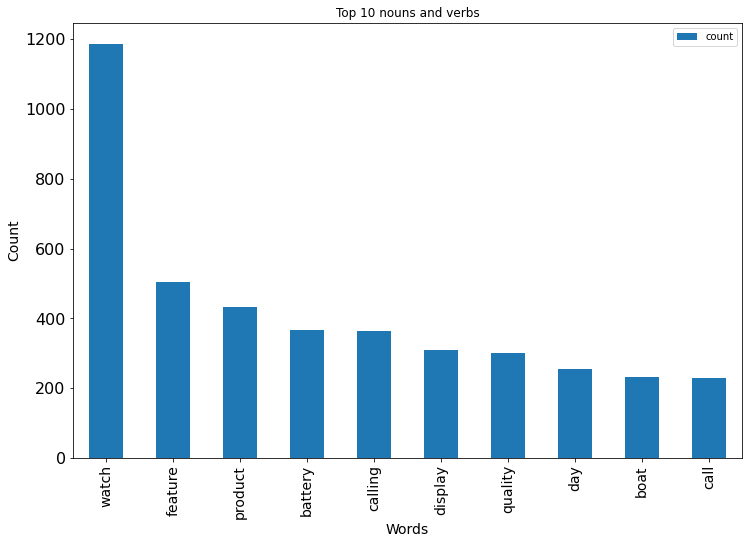

In [64]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## 9. Feature Extraction

### A. BOW Features

In [65]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

### B. TF-IDF Features

In [66]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## 10. Fetch sentiments Using TextBlob

In [67]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [68]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,1367
neg,179


###  Let's calculate subjectivity and Polarity

In [69]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.445186,-0.001294
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,...",0.453527,0.232312
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...,"[good, know, comment, youtube, let, come, con,...",0.219697,0.063636
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che...",0.472312,0.316325
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter...","[used, month, see, pro, battery, run, day, muc...",0.533333,0.400000


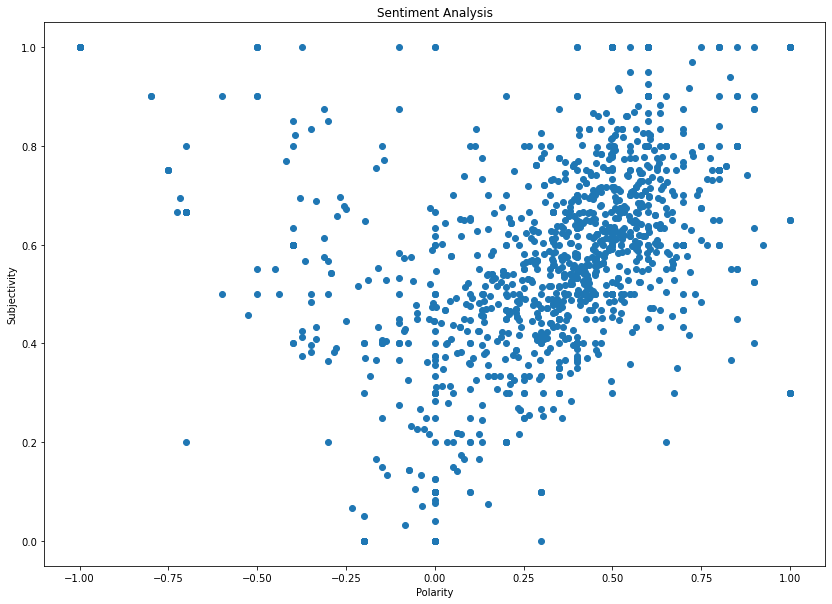

In [70]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [71]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.445186,-0.001294,neg
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,...",0.453527,0.232312,pos
2,good know comment youtube let come con connect...,what good know comments youtube.lets come cons...,"[good, know, comment, youtube, let, come, con,...",0.219697,0.063636,pos
3,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che...",0.472312,0.316325,pos
4,used month see pro battery run day much comfor...,"i used 2 months now. here i see,pros:-- batter...","[used, month, see, pro, battery, run, day, muc...",0.533333,0.400000,pos


## 11. Story Generation and Visualization

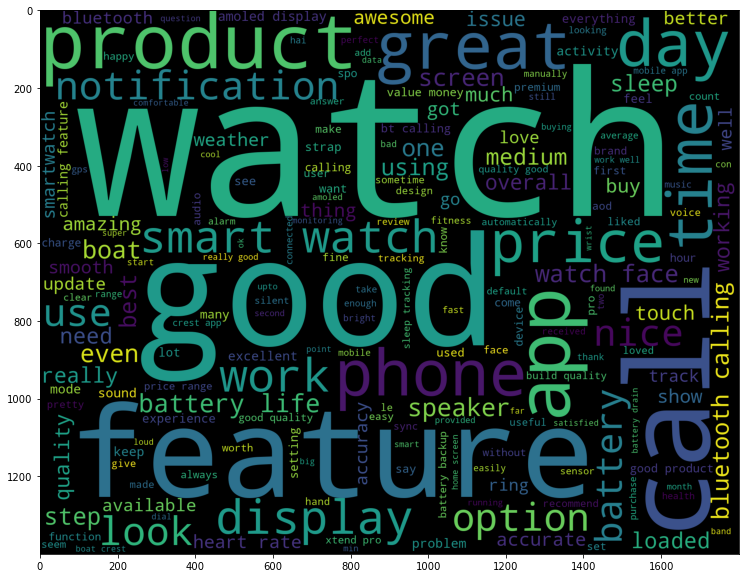

In [72]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

### A. Most common words in positive Review

In [73]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

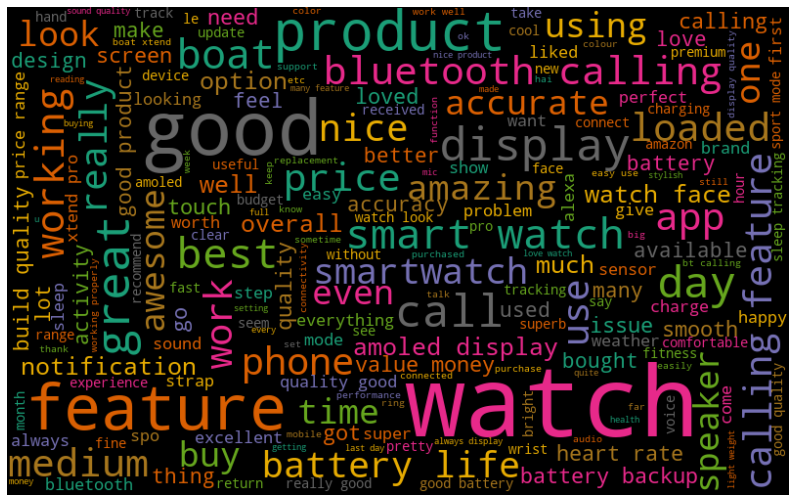

In [74]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### B. Most common words in negative Review

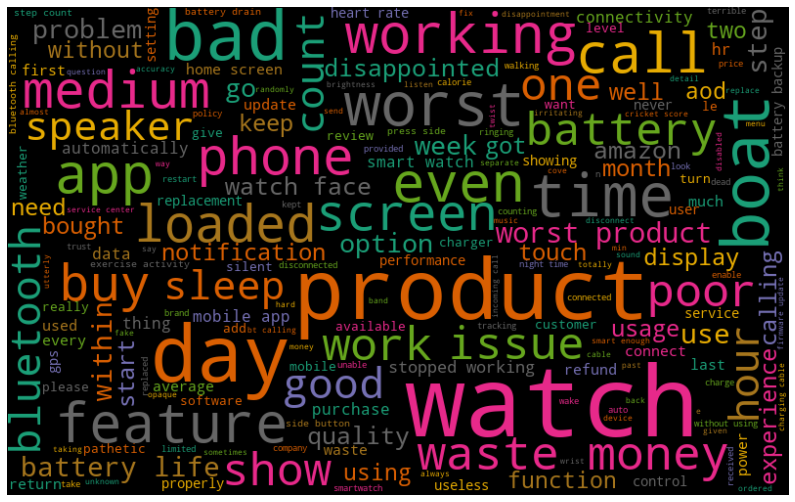

In [75]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

# THE END